# Investigating the popularity of The Office TV show

## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

### 2. Import relevant Packages

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

### 3. Load the Dataset

In [2]:
# read the csv file into pandas dataframe
the_office = pd.read_csv('datasets/office_episodes.csv')
the_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


### 4. Create a Scatterplot

#### 4.1 define the plot components

In [3]:
#define x and y variables
x = the_office['episode_number']
y = the_office['viewership_mil']

In [4]:
#define the color scheme

##initiate list and string
colors = []
color = ''

##loop through the ratings and assign color
for i in the_office['scaled_ratings']:
    if i < 0.25:
        color = 'red'
    elif 0.25 <= i < 0.5:
        color = 'orange'
    elif 0.5 <= i < 0.75:
        color = 'lightgreen'
    elif i >= 0.75:
        color = 'darkgreen'
    colors.append(color)

In [5]:
#define marker size and type

##initialize empty lists and strings
sizes = []
markers = []
size = ''
marker = ''

#loop through the 'has gust' column
for i in the_office['has_guests']:
    if i==True:
        size =250
        marker = '*'
    else:
        size = 25
        marker = 'o'
    
    ##append size and marker to respective lists    
    sizes.append(size)
    markers.append(marker)


#### 4.2 Plot the Scatter Plot

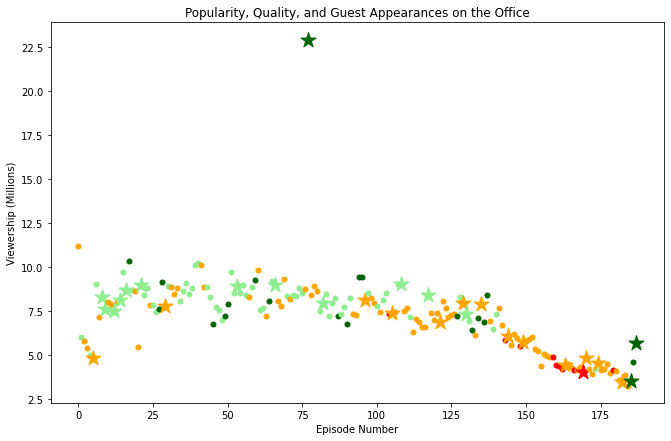

In [7]:
#plot the scatter plot

##initialize fig and set plot size
fig = plt.figure()
plt.rcParams['figure.figsize'] = [11, 7]

##loop through the lists and plot the points
for xp, yp, m, s, c in zip(x, y, markers, sizes, colors):
    plt.scatter(xp, yp, marker=m, c=c, s=s)

##set title and labels
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

### 5. Star in Most Watched Episode

In [13]:
#most views
max_views = the_office['viewership_mil'].max()

# get a string of stars who featured in the most viewed episode with max-views
top_stars = the_office[the_office['viewership_mil']==max_views]['guest_stars'].values[0]

top_stars

'Cloris Leachman, Jack Black, Jessica Alba'

In [14]:
#split the string for stars by ',' to get a list of stars
top_stars_list = top_stars.split(',')
top_stars_list

['Cloris Leachman', ' Jack Black', ' Jessica Alba']

In [15]:
#get the name of one of the stars
top_star = top_stars_list[0]
top_star 

'Cloris Leachman'